In [2]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/NYPD_Arrest_Data_Year_to_Date_.csv")
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281240883,01/28/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,105,0,25-44,M,WHITE,1057545,207911,40.737043,-73.735514,POINT (-73.735514 40.737043)
1,282884120,02/27/2024,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,Q,107,71,45-64,M,WHITE,1037489,206343,40.732881,-73.807899,POINT (-73.807899 40.732881)
2,283137868,03/03/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,48,0,25-44,M,BLACK,1013900,250835,40.855109,-73.892818,POINT (-73.892818 40.855109)
3,287001362,05/16/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200512,F,S,121,0,25-44,M,WHITE,938928,168468,40.628967,-74.163275,POINT (-74.163275 40.628967)
4,287829614,06/02/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,100,0,25-44,M,BLACK,1039777,155013,40.591980,-73.800066,POINT (-73.800066 40.59198)


In [4]:
df.isna().sum()

# lookin like we gots to drop LAW_CAT_CD and KY_CD but ngl we not keepin most of these cols anyway


ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          6
PD_DESC                        0
KY_CD                         26
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1109
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [5]:
clean_arrest_data_ytd = df.dropna()
clean_arrest_data_ytd.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281240883,01/28/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,105,0,25-44,M,WHITE,1057545,207911,40.737043,-73.735514,POINT (-73.735514 40.737043)
1,282884120,02/27/2024,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,Q,107,71,45-64,M,WHITE,1037489,206343,40.732881,-73.807899,POINT (-73.807899 40.732881)
2,283137868,03/03/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,48,0,25-44,M,BLACK,1013900,250835,40.855109,-73.892818,POINT (-73.892818 40.855109)
3,287001362,05/16/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200512,F,S,121,0,25-44,M,WHITE,938928,168468,40.628967,-74.163275,POINT (-74.163275 40.628967)
4,287829614,06/02/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,100,0,25-44,M,BLACK,1039777,155013,40.591980,-73.800066,POINT (-73.800066 40.59198)


In [6]:
# oh and while we're here lets drop the dupes
num_duplicates = clean_arrest_data_ytd.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# yo that's ode...
# drop em

Number of duplicate rows: 0


In [7]:
clean_arrest_data_ytd = clean_arrest_data_ytd.drop_duplicates()
clean_arrest_data_ytd.reset_index(drop=True, inplace=True)
clean_arrest_data_ytd

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281240883,01/28/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,105,0,25-44,M,WHITE,1057545,207911,40.737043,-73.735514,POINT (-73.735514 40.737043)
1,282884120,02/27/2024,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,Q,107,71,45-64,M,WHITE,1037489,206343,40.732881,-73.807899,POINT (-73.807899 40.732881)
2,283137868,03/03/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,48,0,25-44,M,BLACK,1013900,250835,40.855109,-73.892818,POINT (-73.892818 40.855109)
3,287001362,05/16/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200512,F,S,121,0,25-44,M,WHITE,938928,168468,40.628967,-74.163275,POINT (-74.163275 40.628967)
4,287829614,06/02/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,100,0,25-44,M,BLACK,1039777,155013,40.591980,-73.800066,POINT (-73.800066 40.59198)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194307,293968561,09/27/2024,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,109,0,18-24,M,WHITE HISPANIC,1030206,215367,40.757691,-73.834115,POINT (-73.834115 40.757691)
194308,292591949,09/01/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,34,0,25-44,M,WHITE HISPANIC,1004094,251444,40.856808,-73.928265,POINT (-73.92826482905474 40.85680819814297)
194309,294028627,09/29/2024,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402501,F,M,23,0,45-64,M,WHITE,1000141,225685,40.786116,-73.942614,POINT (-73.942614 40.786116)
194310,292933189,09/08/2024,478.0,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,B,44,1,25-44,M,BLACK,1004749,240880,40.827812,-73.925929,POINT (-73.92592932593037 40.82781161940969)


In [8]:
num_duplicates = clean_arrest_data_ytd.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

#ok good they're gone

Number of duplicate rows: 0


In [9]:
# only interested in select features like ARREST_BORO, ARREST_DATE, OFNS_DESC, Latitude, Longitude
cols = ["ARREST_DATE", "OFNS_DESC", "ARREST_BORO", "Latitude", "Longitude"]
clean_arrest_data_ytd = clean_arrest_data_ytd[cols]
clean_arrest_data_ytd

,ARREST_DATE,OFNS_DESC,ARREST_BORO,Latitude,Longitude
0,01/28/2024,FELONY ASSAULT,Q,40.737043,-73.735514
1,02/27/2024,ARSON,Q,40.732881,-73.807899
2,03/03/2024,FELONY ASSAULT,B,40.855109,-73.892818
3,05/16/2024,FELONY ASSAULT,S,40.628967,-74.163275
4,06/02/2024,FELONY ASSAULT,Q,40.591980,-73.800066
...,...,...,...,...,...
194307,09/27/2024,PETIT LARCENY,Q,40.757691,-73.834115
194308,09/01/2024,ASSAULT 3 & RELATED OFFENSES,M,40.856808,-73.928265
194309,09/29/2024,BURGLARY,M,40.786116,-73.942614
194310,09/08/2024,OTHER OFFENSES RELATED TO THEFT,B,40.827812,-73.925929


In [10]:
# also want to sort date into asc order

# Convert the ARREST_DATE column to datetime format
clean_arrest_data_ytd['ARREST_DATE'] = pd.to_datetime(clean_arrest_data_ytd['ARREST_DATE'])
clean_arrest_data_ytd = clean_arrest_data_ytd.sort_values(by='ARREST_DATE', ascending=True)
# Reset the index after sorting
clean_arrest_data_ytd.reset_index(drop=True, inplace=True)

clean_arrest_data_ytd



C:\Users\BeastPV\AppData\Local\Temp\ipykernel_10948\195583484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_arrest_data_ytd['ARREST_DATE'] = pd.to_datetime(clean_arrest_data_ytd['ARREST_DATE'])


,ARREST_DATE,OFNS_DESC,ARREST_BORO,Latitude,Longitude
0,2024-01-01,VEHICLE AND TRAFFIC LAWS,K,40.651169,-73.941892
1,2024-01-01,DANGEROUS WEAPONS,K,40.674123,-73.880803
2,2024-01-01,CRIMINAL MISCHIEF & RELATED OF,B,40.834712,-73.919681
3,2024-01-01,FELONY ASSAULT,K,40.621200,-73.995233
4,2024-01-01,CRIMINAL MISCHIEF & RELATED OF,Q,40.756032,-73.828536
...,...,...,...,...,...
194307,2024-09-30,OFFENSES AGAINST PUBLIC ADMINI,M,40.768891,-73.982093
194308,2024-09-30,DANGEROUS DRUGS,Q,40.693972,-73.794924
194309,2024-09-30,MISCELLANEOUS PENAL LAW,K,40.698323,-73.917495
194310,2024-09-30,GRAND LARCENY,Q,40.757691,-73.834115


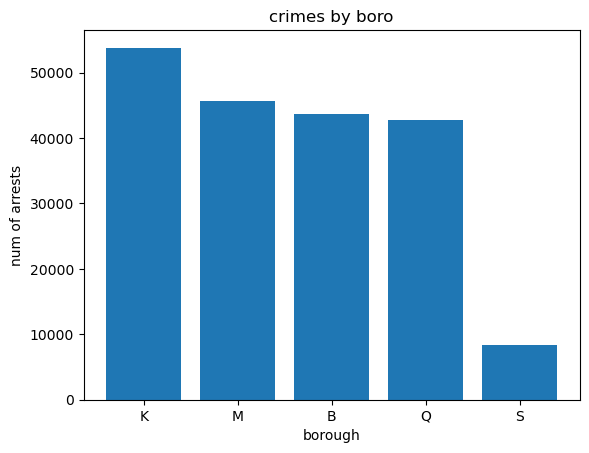

In [11]:
# me being curious
# which boro has the most crimes/arrests?

borough_crime_data = clean_arrest_data_ytd['ARREST_BORO'].value_counts()


plt.bar(borough_crime_data.index, borough_crime_data.values)
plt.xlabel('borough')
plt.ylabel('num of arrests')
plt.title("crimes by boro")
plt.show()


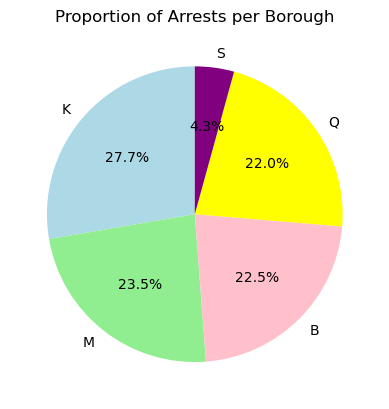

In [12]:
# Group data by borough and count the number of occurrences for each borough
borough_crime_data = clean_arrest_data_ytd['ARREST_BORO'].value_counts()

# Create a pie chart
plt.pie(borough_crime_data, labels=borough_crime_data.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'pink', 'yellow', 'purple'])

# Add a title
plt.title('Proportion of Arrests per Borough')

# Display the plot
plt.show()

In [13]:
# interested in what crimes ppl are being arrested for
print(clean_arrest_data_ytd['OFNS_DESC'].value_counts())

# fortune telling is HILARIOUS


OFNS_DESC
ASSAULT 3 & RELATED OFFENSES        28892
PETIT LARCENY                       19904
FELONY ASSAULT                      17219
DANGEROUS DRUGS                     13731
MISCELLANEOUS PENAL LAW             12433
VEHICLE AND TRAFFIC LAWS            10149
ROBBERY                              9156
GRAND LARCENY                        9099
CRIMINAL MISCHIEF & RELATED OF       8955
OTHER OFFENSES RELATED TO THEFT      8641
DANGEROUS WEAPONS                    8287
OFFENSES AGAINST PUBLIC ADMINI       6705
BURGLARY                             4777
SEX CRIMES                           4612
FORGERY                              3739
OFFENSES INVOLVING FRAUD             3599
OFF. AGNST PUB ORD SENSBLTY &        3284
POSSESSION OF STOLEN PROPERTY        3097
OTHER STATE LAWS                     2761
CRIMINAL TRESPASS                    2034
INTOXICATED & IMPAIRED DRIVING       1971
OTHER TRAFFIC INFRACTION             1781
GRAND LARCENY OF MOTOR VEHICLE       1642
OFFENSES AGAINST THE PER

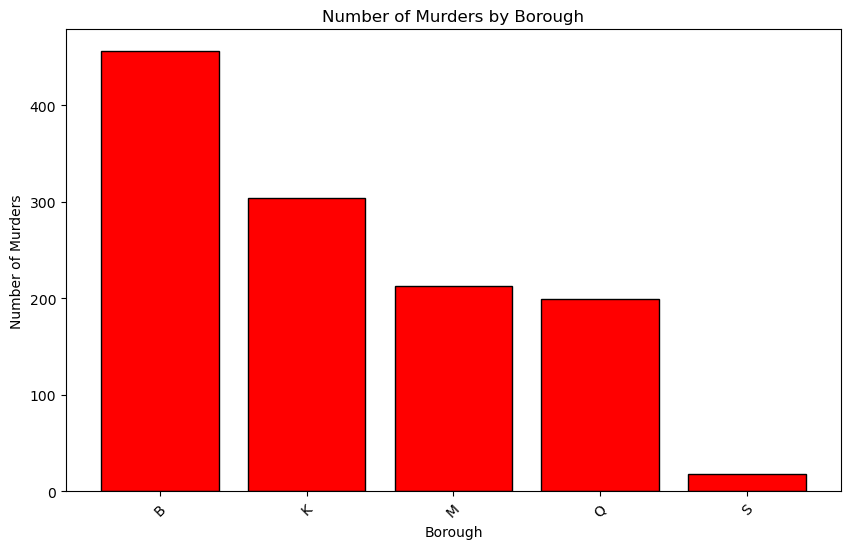

In [14]:
# i wanna see where lots of murder is happening 

# Count the number of murders by borough
murder_boro_counts = clean_arrest_data_ytd[clean_arrest_data_ytd['OFNS_DESC'] == 'MURDER & NON-NEGL. MANSLAUGHTE']['ARREST_BORO'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(murder_boro_counts.index, murder_boro_counts.values, color='red', edgecolor='black')

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Number of Murders')
plt.title('Number of Murders by Borough')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


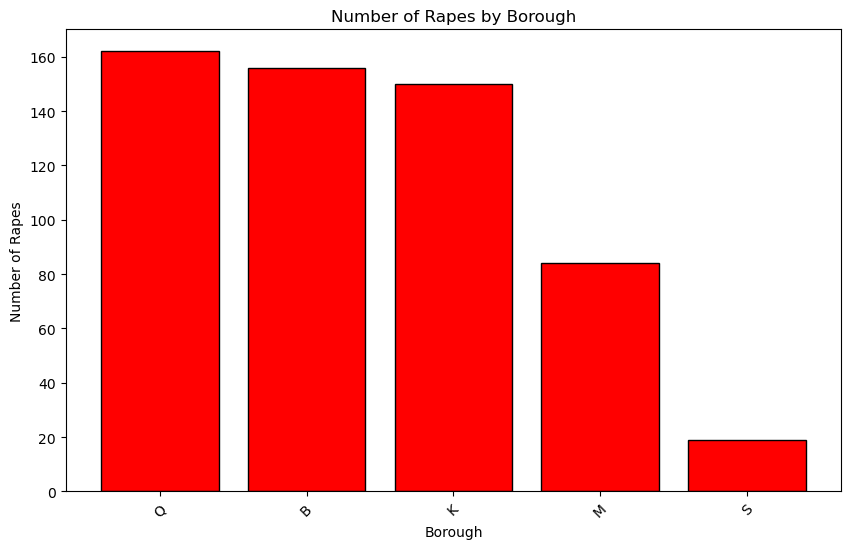

In [15]:
# other crimes such as rape

# Count the number of rape by borough
rape_boro_counts = clean_arrest_data_ytd[clean_arrest_data_ytd['OFNS_DESC'] == 'RAPE']['ARREST_BORO'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(rape_boro_counts.index, rape_boro_counts.values, color='red', edgecolor='black')

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Number of Rapes')
plt.title('Number of Rapes by Borough')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

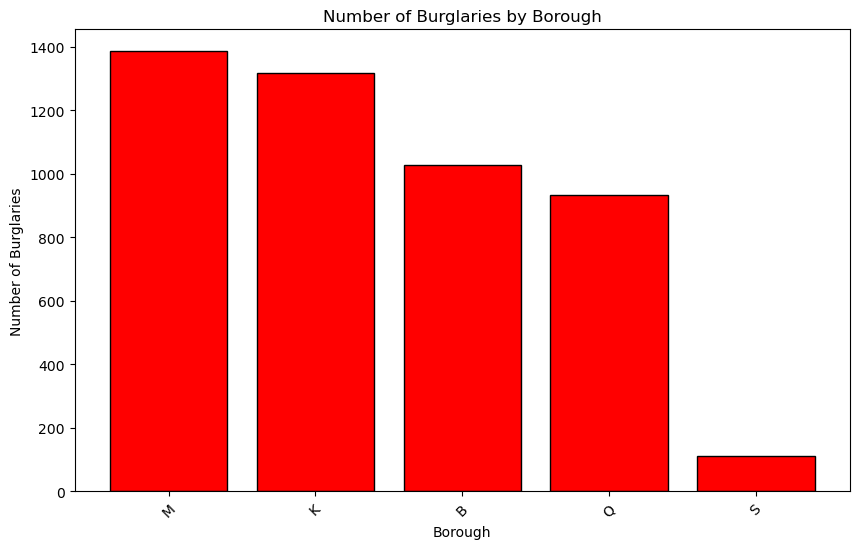

In [16]:
# burglaries

# Count the number of burglaries by borough
burglary_boro_counts = clean_arrest_data_ytd[clean_arrest_data_ytd['OFNS_DESC'] == 'BURGLARY']['ARREST_BORO'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(burglary_boro_counts.index, burglary_boro_counts.values, color='red', edgecolor='black')

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Number of Burglaries')
plt.title('Number of Burglaries by Borough')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

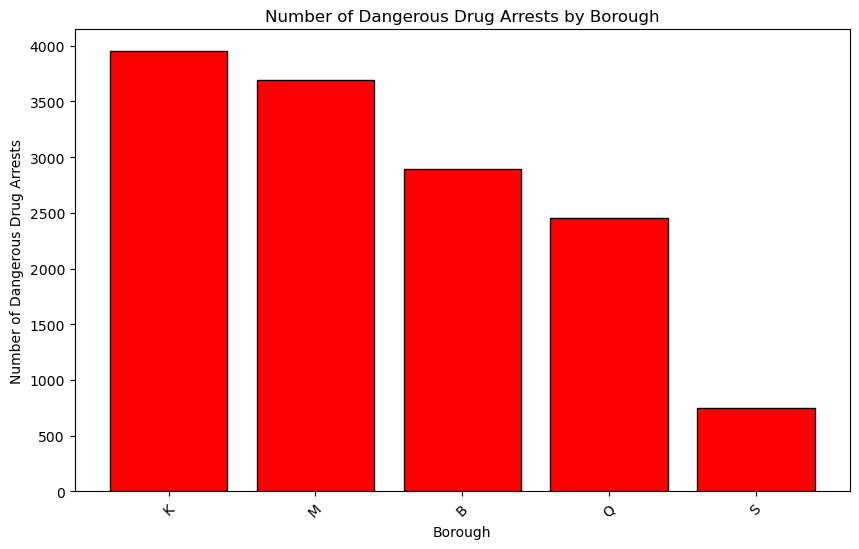

In [17]:
# drugs

# Count the number of dangerous drug arrests by borough
drugs_boro_counts = clean_arrest_data_ytd[clean_arrest_data_ytd['OFNS_DESC'] == 'DANGEROUS DRUGS']['ARREST_BORO'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(drugs_boro_counts.index, drugs_boro_counts.values, color='red', edgecolor='black')

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Number of Dangerous Drug Arrests')
plt.title('Number of Dangerous Drug Arrests by Borough')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

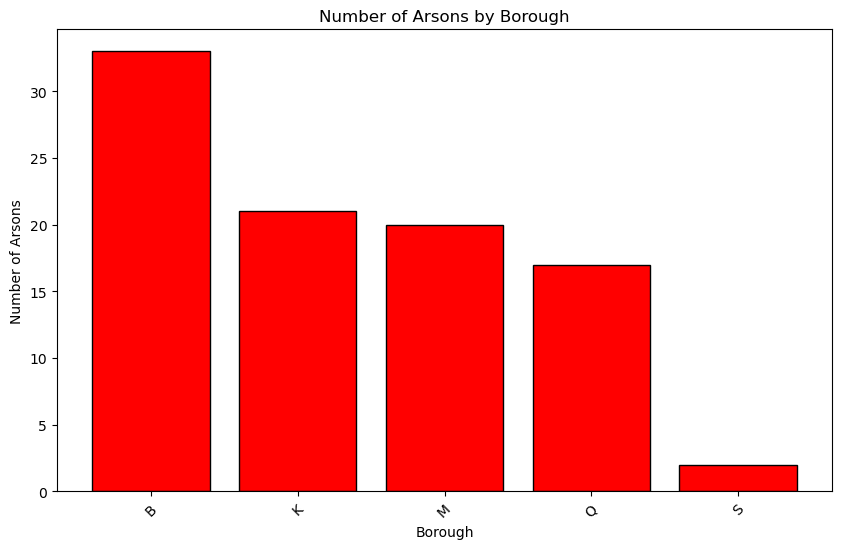

In [18]:
# arson ?

# Count the number of murders by borough
arson_boro_counts = clean_arrest_data_ytd[clean_arrest_data_ytd['OFNS_DESC'] == 'ARSON']['ARREST_BORO'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(arson_boro_counts.index, arson_boro_counts.values, color='red', edgecolor='black')

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Number of Arsons')
plt.title('Number of Arsons by Borough')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

C:\Users\BeastPV\AppData\Local\Temp\ipykernel_10948\3291949558.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(offense_boro_counts.columns))
C:\Users\BeastPV\AppData\Local\Temp\ipykernel_10948\3291949558.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to fit labels


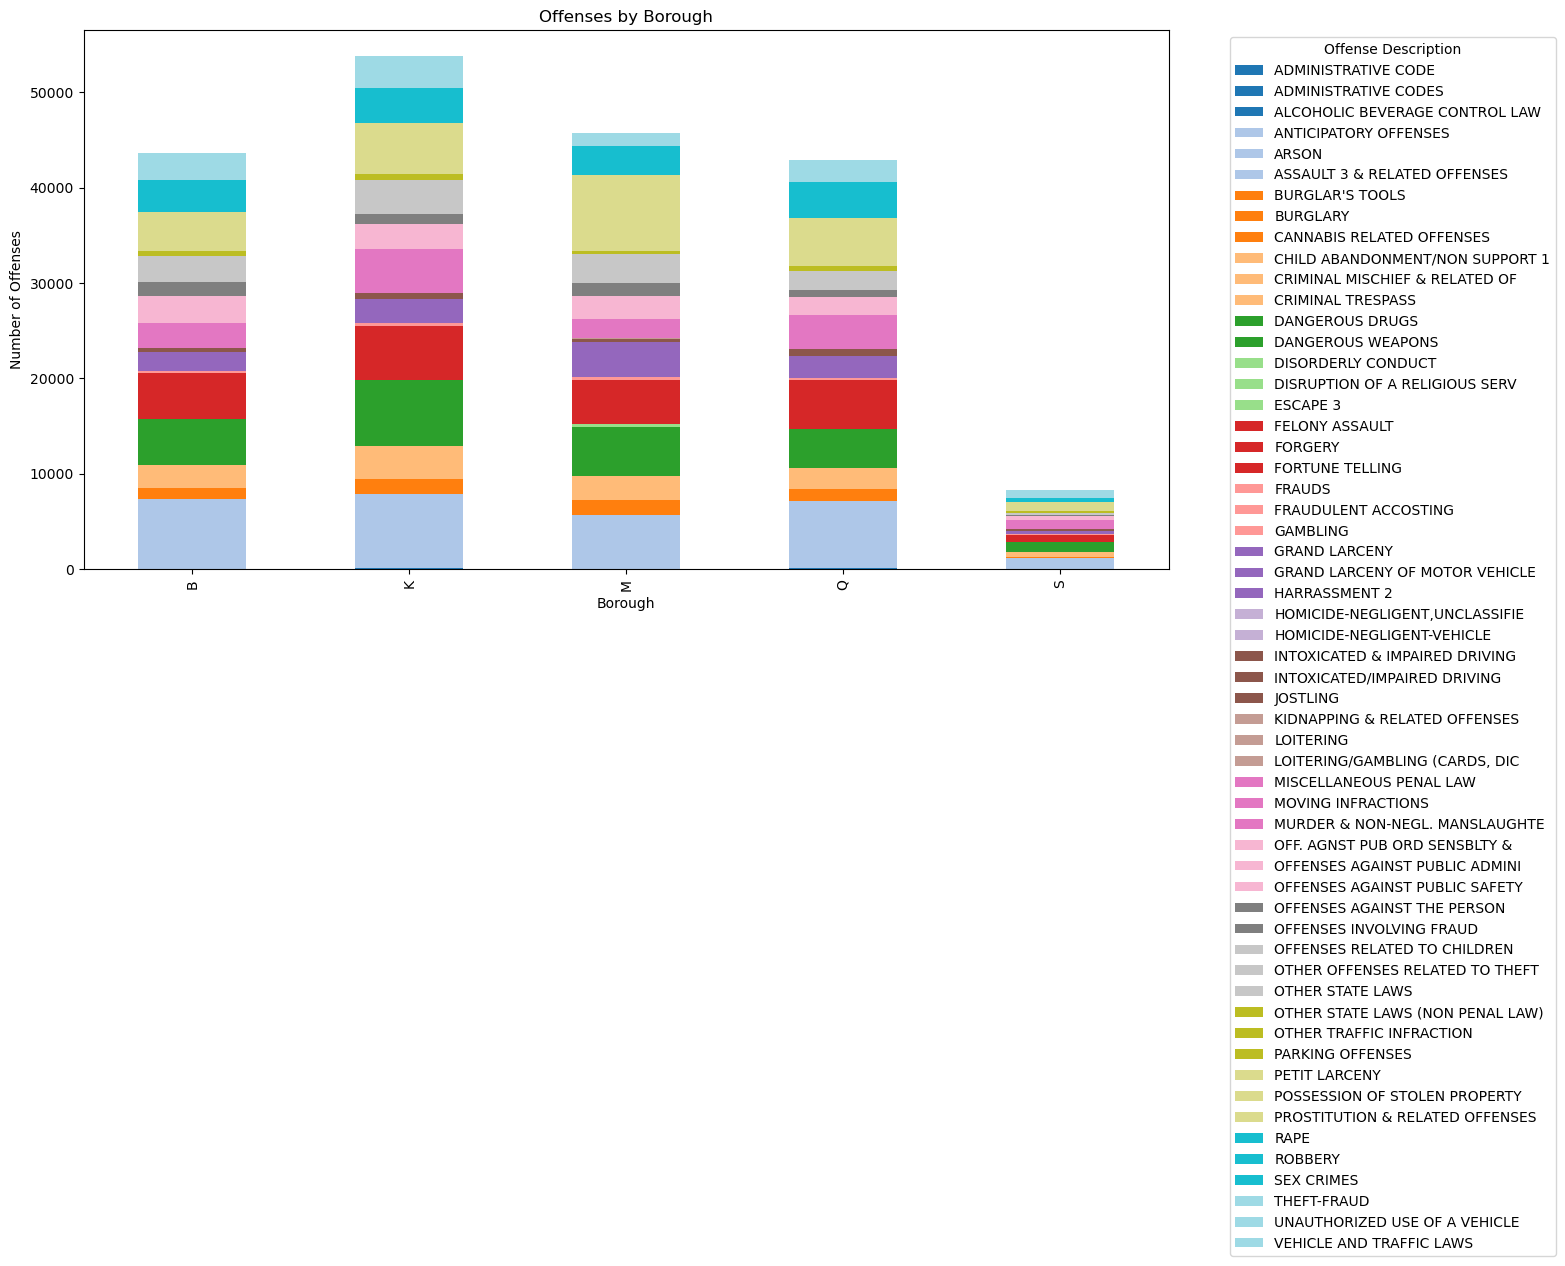

In [19]:
# this is all so cray i would love to do a deep dive on each of these offenses and see which boro comes out on top
# but for time's sake lets visualize all the offenses in a stacked bar plt

# Step 1: Count occurrences of each offense in each borough
offense_boro_counts = clean_arrest_data_ytd.groupby(['ARREST_BORO', 'OFNS_DESC']).size().unstack(fill_value=0)

# Use a colormap and get a list of distinct colors
colors = plt.cm.get_cmap('tab20', len(offense_boro_counts.columns))

# Step 3: Plot the data as a stacked bar plot with distinct colors
offense_boro_counts.plot(kind='bar', stacked=True, figsize=(14, 7), color=[colors(i) for i in range(len(offense_boro_counts.columns))])

# Add titles and labels
plt.title('Offenses by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Offenses')
plt.legend(title='Offense Description', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show() 

In [20]:
# super interesting analytics thus far but before i forget to store the cleaned dataset

clean_arrest_data_ytd.to_csv('data/CLEANED_NYPD_Arrest_Data_YTD', index=False)

OSError: [Errno 22] Invalid argument: 'data/CLEANED_NYPD_Arrest_Data_YTD'

In [21]:
clean_arrest_data_ytd.head()

,ARREST_DATE,OFNS_DESC,ARREST_BORO,Latitude,Longitude
0,2024-01-01,VEHICLE AND TRAFFIC LAWS,K,40.651169,-73.941892
1,2024-01-01,DANGEROUS WEAPONS,K,40.674123,-73.880803
2,2024-01-01,CRIMINAL MISCHIEF & RELATED OF,B,40.834712,-73.919681
3,2024-01-01,FELONY ASSAULT,K,40.621200,-73.995233
4,2024-01-01,CRIMINAL MISCHIEF & RELATED OF,Q,40.756032,-73.828536


In [30]:
#changing name of the ofns_desc column to offense description for better understanding. 

clean_arrest_data_ytd.rename(columns={'OFNS_DESC': 'Offense Description'}, inplace=True)

# arrest boro names are changed to brooklyn, queens , manhattan, bronx, staten island
clean_arrest_data_ytd['ARREST_BORO'].replace({
    'B': 'Bronx',
    'S': 'Staten Island',
    'K': 'Brooklyn',
    'M': 'Manhattan',
    'Q': 'Queens'
}, inplace=True)

clean_arrest_data_ytd.head()

C:\Users\BeastPV\AppData\Local\Temp\ipykernel_10948\2834282423.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_arrest_data_ytd['ARREST_BORO'].replace({


,ARREST_DATE,Offense Description,ARREST_BORO,Latitude,Longitude
0,2024-01-01,VEHICLE AND TRAFFIC LAWS,Brooklyn,40.651169,-73.941892
1,2024-01-01,DANGEROUS WEAPONS,Brooklyn,40.674123,-73.880803
2,2024-01-01,CRIMINAL MISCHIEF & RELATED OF,Bronx,40.834712,-73.919681
3,2024-01-01,FELONY ASSAULT,Brooklyn,40.621200,-73.995233
4,2024-01-01,CRIMINAL MISCHIEF & RELATED OF,Queens,40.756032,-73.828536


In [38]:
#Just wondering if we need staten Island. cuz there's no subway at staten island they have railroad 

clean_arrest_data_ytd[clean_arrest_data_ytd['ARREST_BORO'] == 'Staten Island']

#if we decide to drop staten island:
#statenIslandDropped=  clean_arrest_data_ytd[clean_arrest_data_ytd['ARREST_BORO'] != 'Staten Island']
#statenIslandDropped

,ARREST_DATE,Offense Description,ARREST_BORO,Latitude,Longitude
0,2024-01-01,VEHICLE AND TRAFFIC LAWS,Brooklyn,40.651169,-73.941892
1,2024-01-01,DANGEROUS WEAPONS,Brooklyn,40.674123,-73.880803
2,2024-01-01,CRIMINAL MISCHIEF & RELATED OF,Bronx,40.834712,-73.919681
3,2024-01-01,FELONY ASSAULT,Brooklyn,40.621200,-73.995233
4,2024-01-01,CRIMINAL MISCHIEF & RELATED OF,Queens,40.756032,-73.828536
...,...,...,...,...,...
194307,2024-09-30,OFFENSES AGAINST PUBLIC ADMINI,Manhattan,40.768891,-73.982093
194308,2024-09-30,DANGEROUS DRUGS,Queens,40.693972,-73.794924
194309,2024-09-30,MISCELLANEOUS PENAL LAW,Brooklyn,40.698323,-73.917495
194310,2024-09-30,GRAND LARCENY,Queens,40.757691,-73.834115


In [40]:
clean_arrest_data_ytd.head()
clean_arrest_data_ytd.to_csv('ReadyData.csv', index=False)